<a href="https://colab.research.google.com/github/Bhavya0608-hub/Stock-Price-Prediction/blob/main/Stock_price_prediction_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.18.0
Num GPUs Available: 1


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df1= df.reset_index()['close']

In [ ]:
df1.shape

(1258,)

In [ ]:
df1

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


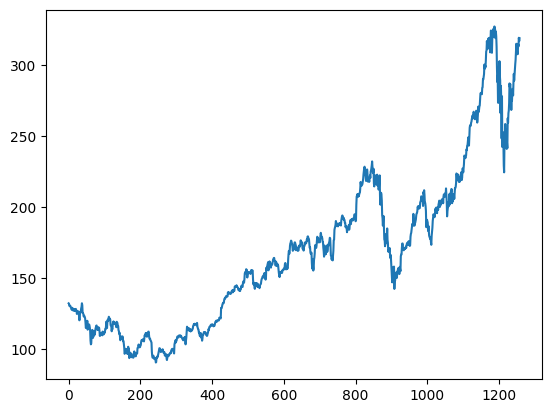

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
training_size= int(len(df1)*0.65)
test_size= len(df1)- training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(817, 441)

In [ ]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [ ]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a= dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step= 100
X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test= create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [ ]:
print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None, None, None)

In [ ]:
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model= Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer= 'adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
  model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0215 - val_loss: 0.0738
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0057 - val_loss: 0.0088
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6659e-04 - val_loss: 0.0069
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.4889e-04 - val_loss: 0.0070
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9192e-04 - val_loss: 0.0073
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.7913e-04 - val_loss: 0.0063
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.4525e-04 - val_loss: 0.0055
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8942e-04 - val_loss: 0.0055
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.4833e-04 - val_loss: 0.0045
Epoch 12/100
12/12 ━━━━

In [ ]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

141.85836130272662

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

237.48822234845073

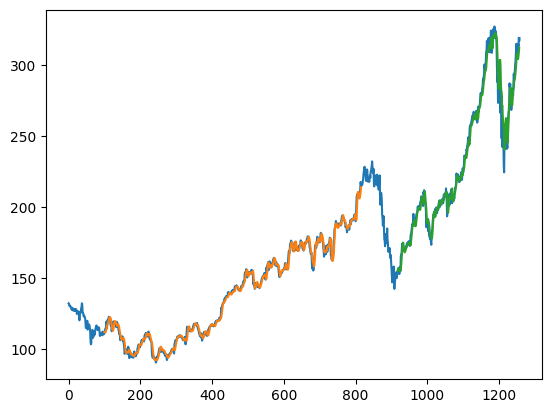

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input= test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input= list(x_input)
temp_input= temp_input[0].tolist()

In [ ]:
# predicting for next 100 vauses

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)


[0.94793755]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [ ]:
day_new=np.arange(1,101)
day_pred= np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)

1258

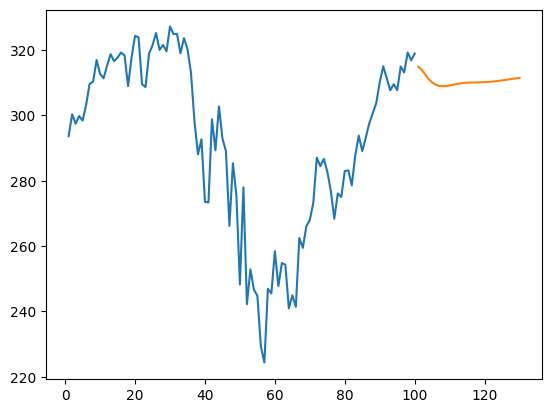

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

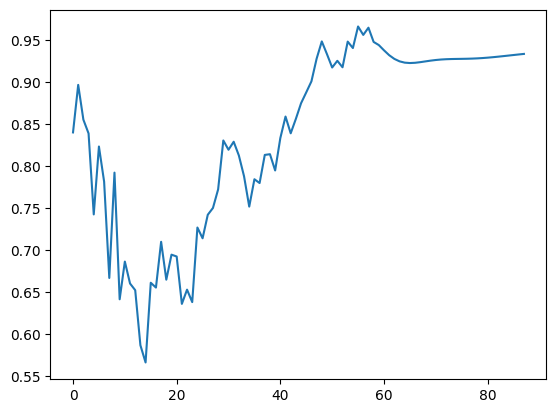

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

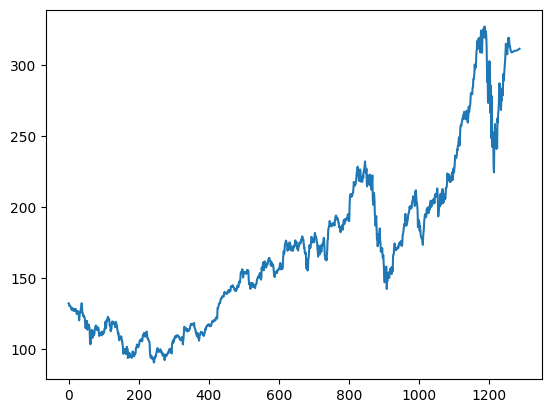

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

plt.plot(df3)

In [ ]:
#predicting for next 100 values

from numpy import array
lst_output2=[]
n_steps2=100
i=0
while(i<100):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps2, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output2.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps2,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output2.extend(yhat.tolist())
        i=i+1


print(lst_output2)


0 day input [0.93427604 0.93488032 0.93546295 0.93602645 0.93657339 0.93710631
 0.93762749 0.93813843 0.93864012 0.93913275 0.9396165  0.94009101
 0.94055599 0.94101137 0.94145733 0.94189364 0.94232053 0.94273883
 0.94314867 0.94355077 0.94394577 0.94433421 0.94471645 0.94509298
 0.94546419 0.94583029 0.94619167 0.94654834 0.94690055 0.94724852
 0.94759202 0.94793159 0.9482668  0.94859821 0.94892579 0.94924933
 0.94956899 0.94988501 0.95019722 0.95050561 0.95081049 0.9511115
 0.95140892 0.95170289 0.95199317 0.95227998 0.95256323 0.95284301
 0.95311934 0.95339221 0.95366174 0.9539277  0.95419043 0.95444971
 0.95470566 0.95495832 0.95520777 0.95545381 0.95569694 0.95593679
 0.95617348 0.95640695 0.95663738 0.95686501 0.95708954 0.95731127
 0.95753002 0.95774579 0.95795888 0.95816904 0.95837659 0.95858121
 0.95878321 0.95898253 0.95917904 0.95937335 0.95956486 0.95975387
 0.95994043 0.96012443 0.96030605 0.96048516 0.96066207 0.96083659
 0.96100861 0.96117836 0.96134621 0.96151155 0.9616

In [ ]:
day_new2=np.arange(1,101)
day_pred2= np.arange(101,201)

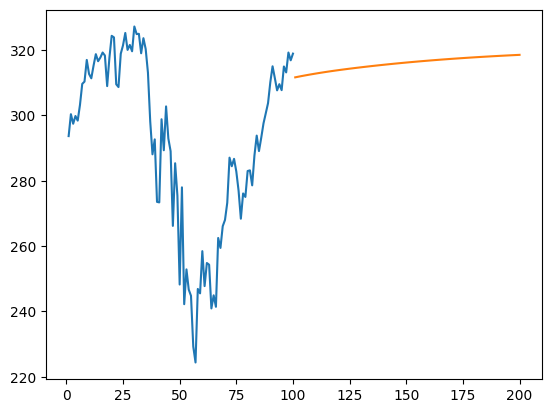

In [ ]:
plt.plot(day_new2, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred2, scaler.inverse_transform(lst_output2))

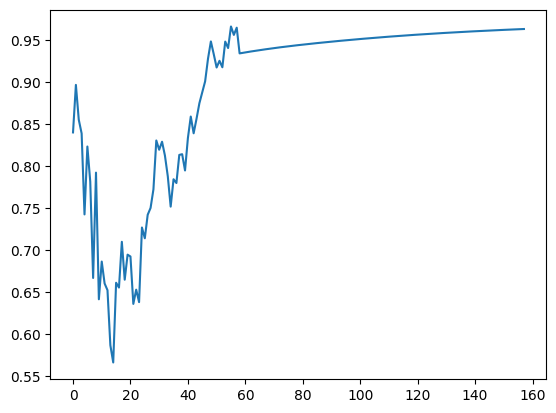

In [ ]:
df4=df1.tolist()
df4.extend(lst_output2)
plt.plot(df4[1200:])

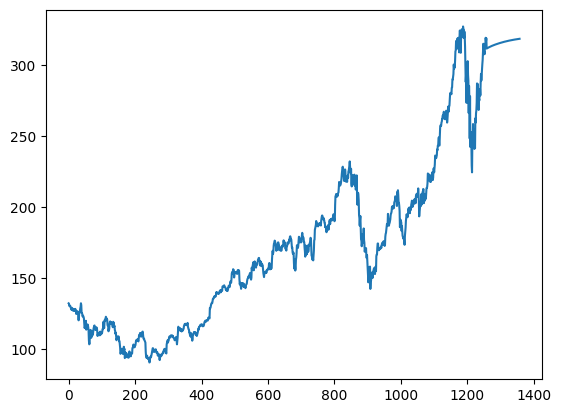

In [ ]:
df4=scaler.inverse_transform(df4).tolist()

plt.plot(df4)